#Activity 05 - Experiments

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
ssl._create_default_https_context = ssl._create_unverified_context

# Dataset

[Dataset information](http://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

### Features

* **instant** : record index
* **dteday** : date
* **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
* **yr** : year (0:2011, 1:2012)
* **mnth** : month (1 to 12)
* **hr** : hour (0 to 23)
* **holiday** : whether day is holiday or not
* **weekday** : day of the week
* **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
* **weathersit** :
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp** : Normalized temperature in Celsius. The values are derived via * $(t-t_{min})/(t_{max}-t_{min})$, $t_{min}=-8$, $t_{max}=+39$ (only in hourly scale)
* **atemp**: Normalized feeling temperature in Celsius. The values are derived via $(t-t_{min})/(t_{max}-t_{min})$, $t_{min}=-16$, $t_{max}=+50$ (only in hourly scale)
* **hum**: Normalized humidity. The values are divided to 100 ($max$)
* **windspeed**: Normalized wind speed. The values are divided to 67 ($max$)
* **casual**: count of casual users
* **registered**: count of registered users

### Outcome
* **cnt**: count of total rental bikes including both casual and registered

*** 
# Exercise #1 - Load data
*** 

1.1 Download data file and `unzip`.

In [2]:
# run this code
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
!unzip 'Bike-Sharing-Dataset.zip'
# you only need to run once
# you may comment these lines out after running (in case you run-all later)

--2020-04-14 16:53:18--  http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.8’

Bike-Sharing-Datase 100%[===================>] 273.43K   984KB/s    in 0.3s    

2020-04-14 16:53:19 (984 KB/s) - ‘Bike-Sharing-Dataset.zip.8’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Readme.txt              
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: day.csv                 
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hour.csv                


1.2 Load the dataset from the url and `display(df)`.

> Header is included in the `.csv`

In [3]:
# load the dataset into a dataframe
file = 'day.csv'
df = pd.read_csv(file)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


##### 1.3 Count the number of records

In [4]:
# count the number of rows
df.shape

(731, 16)

##### 1.4 Drop non-feature columns

In [5]:
# drop 'instant' and 'dteday'
df = df.drop(['instant', 'dteday'], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


##### 1.5 Describe the data

In [6]:
# describe the data
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


*** 
# Exercise #2 - Build a pipeline
*** 

##### 2.1 Split features and class output

In [7]:
# split to X and y
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print(X.shape, y.shape)

(731, 13) (731,)


##### 2.2 Partition to train and test (0.33)

In [0]:
# partition to train and test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.33,
                     random_state=1)

##### 2.4 Build a pipeline

> For your pipeline, use:
* `StandardScaler()`
* `RandomForestRegressor(n_estimators=10, max_features='sqrt')` for the classifier.  

Do not use `PCA`.

In [0]:
# build a pipeline
pipe = make_pipeline(StandardScaler(),
                        RandomForestRegressor(n_estimators=10, max_features='sqrt'))


##### 2.5 Train model and predict test set

> Save your prediction in variable `y_pred`.

In [10]:
# train your pipeline; predict test set; display accuracy
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Test Accuracy: %.3f' % pipe.score(X_test, y_test))

Test Accuracy: 0.970


##### Self Check

In [11]:
# predict train set and print accuracy
print('Train Accuracy: %.3f' % pipe.score(X_train, y_train))

Train Accuracy: 0.990


> `Train Accuracy: 0.990`

*** 
# Exercise #3 - Explore the results
***

Now, let's examine these results to get a sense of of our predictions.

##### 3.1 Print `y_test` and see the `y` true values

In [12]:
# print y_test
print(y_test)

[3830 2114 3915 4322 6591 5204 5323 3351 3068 4972 3351 1977  822 2485
 7736 2368 5515 6572 4511 4359 1851 7335 4758 2689 4966 4118 6824 4375
 3389 2475  754 3523 1683 1749 6241 4570 1416 3368 6591 4023 4553 7424
 4840 5728 5202 4717 7338 4035 2277 4866 2034 7693 3403 1812 4304 2947
 1969 7006 4656 1927 2376 2134 5084 2121 4154 8294 4592 5319 1685 3204
 7261 6825 5035 1562 7444 7415 7765 4507 1872 3310 4826 3376 7570 2402
 5267 3659 3126 4150 6864 3574 1005 5058 5138 5342 3005 1746 1000 6891
 4665 1341 3577  985 4367 5047 6192 2192 2594 2169 2133 2302 4058 3644
 2425 3740 4788 4509 7458 5538 4066 7273 2496 3761 6597 1693 2918 3322
 1421 3333 5478 4905 3249 8362 7592 4630 3785 5847  627 6203 4105 3190
 2739 5087 5686 5611 1538 5382  623 3239 4459 7836 4917 7282 8173 4595
 7466 3194 1708 3784 7494 1013 6536 6569 5312 1865 3727 2177 5362 3429
  683 3292 4195 3422 3387 5409 3750 1977 1815 7509 5336 2311 1162 1536
 7641 7001 4758 6691 7393 3867 2429 7582 6917 5698 4790 4401 1635 1360
 7534 

##### 3.2 Print `y_pred` and see the predicted `y` values

In [13]:
# print `y_pred`
print(y_pred)

[3922.3 2073.8 3912.5 4348.1 6175.9 5016.6 4910.1 3761.2 2990.3 5005.1
 3269.8 2093.2 1084.2 2898.9 7212.5 2182.4 5409.3 6537.2 4905.3 4678.5
 1899.7 7345.6 4704.5 2469.7 4971.9 4403.5 6492.1 4465.5 3472.1 2220.4
 1538.7 3638.8 1866.2 2008.7 5939.6 4590.4 1534.4 3636.7 6589.6 4043.5
 4663.8 7201.1 5432.8 5646.1 5405.4 5092.8 7144.2 4078.6 2811.5 4967.2
 2712.1 7371.9 3571.9 1852.5 4346.8 2648.5 1841.2 7180.6 4666.  2048.9
 2285.  1866.8 5105.4 2111.  4042.2 7525.9 4596.3 5216.3 1691.1 3255.7
 7054.7 6768.6 5030.2 1527.7 7038.8 7183.2 7570.5 4459.2 1637.9 3404.6
 4644.  3929.7 6633.7 2042.5 5203.9 3866.6 3199.4 4396.3 6720.3 3904.
 1558.6 5031.6 5159.7 5548.6 3078.2 1872.5 1033.1 6632.4 4761.6 1336.1
 3603.9 1780.  4878.6 4836.1 6584.8 2113.3 2733.2 1987.4 1964.5 2297.4
 4124.1 4067.3 2787.8 3817.5 4847.7 4655.1 7545.8 5424.9 4873.6 6960.9
 2848.6 3844.4 6149.  2429.8 2795.  3406.  1582.4 3313.3 5460.  4845.
 3002.2 7225.4 6993.9 4555.3 3924.1 5960.3 1310.6 6177.2 4074.3 3360.9
 2647.6 

##### 3.3 Make a new dataframe with true `y` values and predicted `y` values

Combine your true and predicted values into one new dataframe
* use `pd.DataFrame(..)` to construct the dataframe
* name the new dataframe `df_result`
* it will have two columns
* add `y_test` as column `'true'`
* add `y_pred` as column `'pred'`

> **Example**: create a dataframe
>
>```df_new = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 
                   'C':[7,8,9], 'D':[10,11,12]})```

In [14]:
# create new dataframe df_results with 'true' (ytest) and 'pred' (y_pred)
df2 = pd.DataFrame()
df2['pred'] = y_pred
df2['true'] = y_test
df2

,pred,true
0,3922.3,3830
1,2073.8,2114
2,3912.5,3915
3,4348.1,4322
4,6175.9,6591
...,...,...
237,3744.8,3613
238,4081.5,4205
239,4845.4,5191
240,6378.3,6304


##### 3.4 Create a new column `'error'` in `df_results`

The error for any predicted example is:
$$ error_i = \ \mid true_i - pred_i \ \mid $$

In [23]:
# create new column 'error' in df_results
df2['error'] = df2['true'] - df2['pred']
df2['error'] = df2['error'].abs()
df2

,pred,true,error
0,3922.3,3830,92.3
1,2073.8,2114,40.2
2,3912.5,3915,2.5
3,4348.1,4322,26.1
4,6175.9,6591,415.1
...,...,...,...
237,3744.8,3613,131.8
238,4081.5,4205,123.5
239,4845.4,5191,345.6
240,6378.3,6304,74.3


##### 3.5 Normalize the `'error'` column and display `df_results`

In [24]:
# min-max scale the error to [0..1]
min_max_scaler = MinMaxScaler()
df2['error'] = min_max_scaler.fit_transform(df2[['error']])
df2['error']

0      0.064878
1      0.027693
2      0.000785
3      0.017629
4      0.295268
         ...   
237    0.093070
238    0.087146
239    0.245664
240    0.052031
241    0.496110
Name: error, Length: 242, dtype: float64

> Note: we normalized our error $[0,1]$ for use in visualization in the next section. 

##### 3.6 Describe `df_results`

In [38]:
# describe df_results
df2.describe()

,pred,true,error
count,242.000000,242.000000,242.000000
mean,4294.101653,4280.057851,0.169621
std,1818.448202,1994.420411,0.175731
min,901.800000,22.000000,0.000000
25%,2789.600000,2694.250000,0.051281
50%,4347.450000,4138.500000,0.114589
75%,5430.825000,5599.750000,0.235440
max,7570.500000,8362.000000,1.000000


*** 
# Exercise #4 - Visualizing results
*** 

> A graph without title and axes labels is often no more useful than no graph at all. Always set a title and label your axes.

##### 4.1 Graph `'true'` vs `'pred'` test

Scatterplot your `df_results`:
* $x$-axis is `'true'`
* $y$-axis is `'pred'`
* `xlabel` is 'True'
* `label` is 'Predicted'
* `title` is 'Preciction Results'

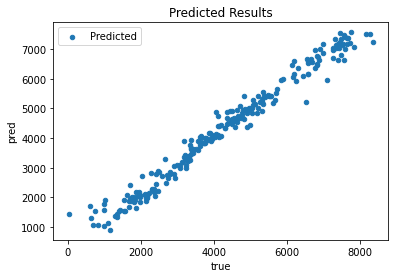

In [26]:
# scatter plot 'true' vs 'pred'
df2.plot.scatter(x='true',
                      y='pred',
                 label='Predicted',
                 title='Predicted Results')

> Here we should see the `'true'` values along x-axis and the `'predicted'` values along the y-axis. You should see the points clustered in an "almost" line along the diagnonal. 

##### 4.2 Add color to better visualize the error

Scatter plot your `df_results` again
* repeat your code from `4.1`
* modify to add color `c` equal to the normalized `'error'` values

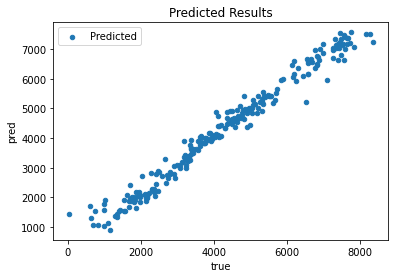

In [30]:
# graph 'true' vs 'pred'
df2.plot.scatter(x='true',
                      y='pred',
                 label='Predicted',
                 title='Predicted Results')

4.3 Add regressive line to graph

Scatter plot your `df_results` yet again
* repeat your code from `4.2`
* add line `m, b = np.polyfit(x, y, 1)`
* add line `plt.plot(x, m*x + b, color='red')`
* where `x` and `y` are your `'true'` and `'pred'` series

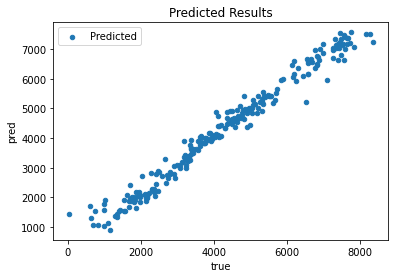

In [31]:
# graph 'true' vs 'pred' with line
df2.plot.scatter(x='true',
                      y='pred',
                 label='Predicted',
                 title='Predicted Results')

> Now that's a *perdy* plot.

4.4 Visualize the learning curve

Copy block of code from `Lecture 05` in order to plot the learning curve. Modify to use the pipeline (and classifier) you used in this `Activity 05`. Set your `ylim` to be $[0.75, 1.03]$.

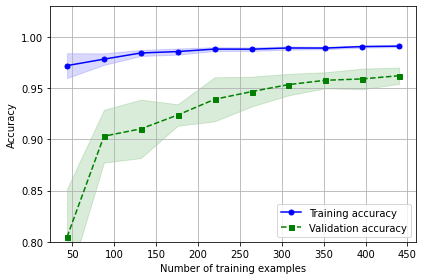

In [33]:
# plot the learning
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

> **Self Check**: 
>
> The first <font color="blue">blue</font> point is $\approx (48,0.97)$. 
>
> The first <font color="green">green</font> point varies in `y` (try re-running!) in the  range of  $\approx$ $(48,0.77)$ to $\approx$ $(48,0.82)$.

*** 
# Exercise #5 - $k$-fold cross-validation
*** 

Earlier we split the data into $1\over3$ `test` and $2\over3$ `train`. While this is fine practice for very large datasets, for small datasets we run the risk of producing a non-representive `test` set.  Let's investigate this possibility by examinig results with cross-validation.

5.1 Perform cross-fold validation.

Use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) cross-validation with $k=10$.

> This is a regression problem and our predictor is continuous. You don't want `StratifiedKFold` for this reason. 

In [39]:

kfold = KFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.983
Fold:  2, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.957
Fold:  3, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.966
Fold:  4, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.968
Fold:  5, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.954
Fold:  6, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.938
Fold:  7, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.962
Fold:  8, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.957
Fold:  9, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.958
Fold: 10, Class dist.: [0 0 0 ... 0 0 1], Acc: 0.960

CV accuracy: 0.960 +/- 0.011


> Cross-validation is the proper approach for all but very large datasets.

<img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">